**Ссылки**

https://drive.google.com/file/d/1evxNg_aEenj6W4LJ6vOjsjEqdcAlQl-P/view?usp=sharing

https://drive.google.com/file/d/1XKnSU5cZbxPdXmQleXgiSECJ9fJHLbFn/view?usp=sharing

**Загрузка файлов с диска**

In [ ]:
! gdown --id 1evxNg_aEenj6W4LJ6vOjsjEqdcAlQl-P

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1evxNg_aEenj6W4LJ6vOjsjEqdcAlQl-P
To: /content/hr.zip
100% 302k/302k [00:00<00:00, 76.7MB/s]


In [ ]:
! gdown --id 1XKnSU5cZbxPdXmQleXgiSECJ9fJHLbFn

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1XKnSU5cZbxPdXmQleXgiSECJ9fJHLbFn
To: /content/inter.zip
100% 2.53k/2.53k [00:00<00:00, 11.2MB/s]


**Распаковка**

In [ ]:
! unzip '/content/inter.zip'

Archive:  /content/inter.zip
  inflating: Internet Speed 2022.csv  


In [ ]:
! unzip '/content/hr.zip'

Archive:  /content/hr.zip
  inflating: aug_test.csv            
  inflating: aug_train.csv           
  inflating: sample_submission.csv   


**Библиотеки**

In [ ]:
! pip install phik

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 11.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib as plt
import numpy as np
import phik
from phik.report import plot_correlation_matrix
from phik import report
import seaborn as sns
plt.style.use('dark_background')

**Чтение данных**

In [ ]:
dff = pd.read_csv('/content/aug_train.csv')

In [ ]:
dff

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


**Пропуски**

In [ ]:
dff.isna().mean().sort_values(ascending = False)

,0
company_type,0.320493
company_size,0.309949
major_discipline,0.146832
new_education_level,0.024011
education_level,0.024011
last_new_job,0.022080
enrolled_university,0.020148
experience,0.003393
enrollee_id,0.000000
city,0.000000


**Исследование данных (Сводники)**

In [ ]:
dff['target'].mean()

np.float64(0.24934753105752167)

In [ ]:
dff.groupby('gender')['target'].mean()

,target
gender,
Female,0.263328
Male,0.227819
Other,0.261780


In [ ]:
dff.groupby('gender', dropna = False)['target'].agg(['count', 'mean'])

,count,mean
gender,,
Female,1238,0.263328
Male,13221,0.227819
Other,191,0.261780
NaN,4508,0.308119


In [ ]:
dff.groupby('education_level', dropna = False)['target'].agg(['count', 'mean'])

,count,mean
education_level,,
Graduate,11598,0.279790
High School,2017,0.195340
Masters,4361,0.214400
Phd,414,0.140097
Primary School,308,0.133117
NaN,460,0.226087


<Axes: xlabel='education_level'>

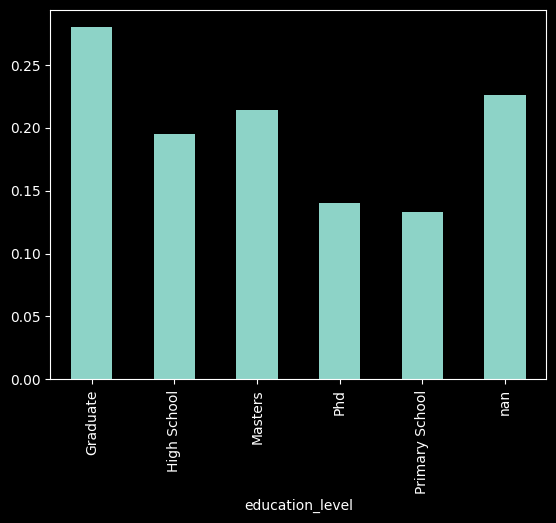

In [ ]:
dff.groupby('education_level', dropna = False)['target'].mean().plot(kind = 'bar')

In [ ]:
dff['city_development_index_group'] = pd.cut(dff['city_development_index'], 5)

In [ ]:
dff.groupby('city_development_index_group', dropna=False)['target'].agg(['count', 'mean'])

/tmp/ipython-input-3171919694.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dff.groupby('city_development_index_group', dropna=False)['target'].agg(['count', 'mean'])


,count,mean
city_development_index_group,,
"(0.447, 0.548]",178,0.578652
"(0.548, 0.648]",3297,0.582651
"(0.648, 0.749]",1529,0.273381
"(0.749, 0.849]",1949,0.194459
"(0.849, 0.949]",12205,0.160262


<Axes: >

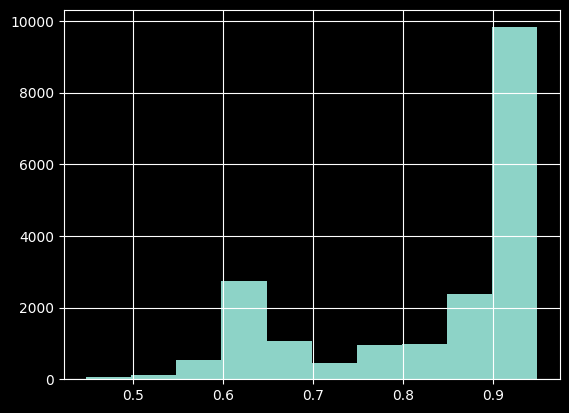

In [ ]:
dff['city_development_index'].hist()

**Фильтрация по квантилю**

In [ ]:
q = dff['city_development_index'].quantile(0.25) #пробное

In [ ]:
q

np.float64(0.74)

In [ ]:
len(dff[dff['city_development_index'] < q]) / len(dff)

0.24903434596513205

In [ ]:
q = dff['city_development_index'].quantile(0.05)

In [ ]:
q

np.float64(0.624)

<Axes: >

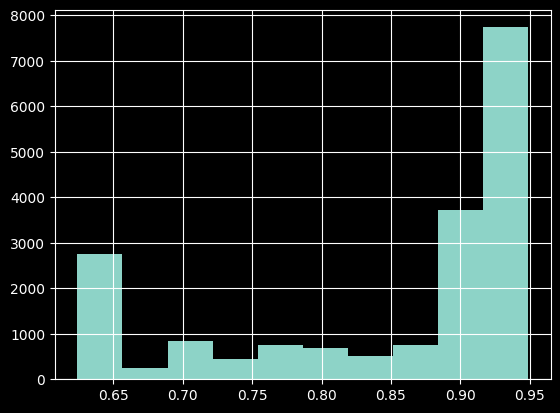

In [ ]:
dff[dff['city_development_index'] >= q]['city_development_index'].hist()

Теперь представлена гистограмма для 95% данных, которые выше 5-го процентиля

**Создание новой категориальной переменной, которая разбивает числовой столбец на 5 равный групп**

In [ ]:
dff['city_development_index_group_q'] = pd.qcut(dff['city_development_index'], 5, duplicates = 'drop')

Группировка и агрегация данных по квартильным группам

In [ ]:
t = dff.groupby('city_development_index_group_q', dropna = False)['target'].agg(['count', 'mean'])

/tmp/ipython-input-3879010955.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  t = dff.groupby('city_development_index_group_q', dropna = False)['target'].agg(['count', 'mean'])


In [ ]:
t['count'].sum()

np.int64(19158)

Столбчатая диаграмма для визуализации средних значений по группам

<Axes: xlabel='city_development_index_group_q'>

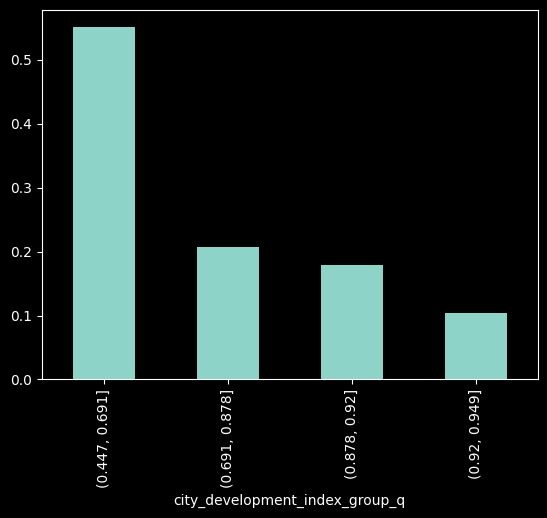

In [ ]:
t['mean'].plot(kind = 'bar')

**Перегруппировка**

In [ ]:
dff.groupby('education_level', dropna = False)['target'].agg(['count', 'mean'])

,count,mean
education_level,,
Graduate,11598,0.279790
High School,2017,0.195340
Masters,4361,0.214400
Phd,414,0.140097
Primary School,308,0.133117
NaN,460,0.226087


In [ ]:
def education_group(x):
  if x in ['High School', 'Primary School']:
    return 'School'
  if x in ['Masters', 'Phd']:
    return 'Masters_and_Phd'
  return x

In [ ]:
dff['new_education_level'] = dff['education_level'].apply(education_group)

In [ ]:
dff.groupby('new_education_level', dropna = False)['target'].agg(['count', 'mean'])

,count,mean
new_education_level,,
Graduate,11598,0.279790
Masters_and_Phd,4775,0.207958
School,2325,0.187097
NaN,460,0.226087


In [ ]:
dff['education_level'].replace('Primary School', 'School')

,education_level
0,Graduate
1,Graduate
2,Graduate
3,Graduate
4,Masters
...,...
19153,Graduate
19154,Graduate
19155,Graduate
19156,High School


In [ ]:
d = {'Primary School':'School'}

In [ ]:
dff['education_level'].map(d)

,education_level
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
19153,NaN
19154,NaN
19155,NaN
19156,NaN


Функция с несколькими столбцами

In [ ]:
def new_training_hours(row):
  if row['education_level'] == 'Phd':
    return row['training_hours'] + 1000
  return row['training_hours']

In [ ]:
dff.apply(new_training_hours, axis = 1)

,0
0,36
1,47
2,83
3,52
4,8
...,...
19153,42
19154,52
19155,44
19156,97


In [ ]:
dff.groupby(['new_education_level', 'gender'], dropna = False)['target'].agg(['count', 'mean'])

count      mean
new_education_level gender                 
Graduate            Female    773  0.279431
                    Male     8144  0.257122
                    Other     112  0.330357
                    NaN      2569  0.349552
Masters_and_Phd     Female    386  0.233161
                    Male     3237  0.186284
                    Other      31  0.096774
                    NaN      1121  0.264942
School              Female     71  0.267606
                    Male     1598  0.171464
                    Other      39  0.205128
                    NaN       617  0.217180
NaN                 Female      8  0.125000
                    Male      242  0.169421
                    Other       9  0.222222
                    NaN       201  0.298507

**Pivot table**

In [ ]:
dff.pivot_table(index = 'new_education_level', columns = 'gender', values = 'target', aggfunc = ['count', 'mean'])

count                  mean                    
gender              Female  Male Other    Female      Male     Other
new_education_level                                                 
Graduate               773  8144   112  0.279431  0.257122  0.330357
Masters_and_Phd        386  3237    31  0.233161  0.186284  0.096774
School                  71  1598    39  0.267606  0.171464  0.205128

In [ ]:
dff['gender'] = dff['gender'].fillna('no_info')

In [ ]:
h = dff.pivot_table(index = 'new_education_level', columns = 'gender', values = 'target', aggfunc = ['mean'])

In [ ]:
h

mean                              
gender                 Female      Male     Other   no_info
new_education_level                                        
Graduate             0.279431  0.257122  0.330357  0.349552
Masters_and_Phd      0.233161  0.186284  0.096774  0.264942
School               0.267606  0.171464  0.205128  0.217180

Работа с heatmap

<Axes: xlabel='None-gender', ylabel='new_education_level'>

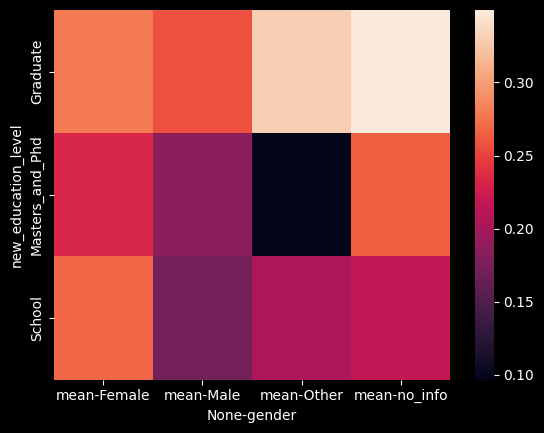

In [ ]:
sns.heatmap(h)

Просмотр корреляции переменных

In [ ]:
dff[['city_development_index', 'training_hours', 'target']].corr()

,city_development_index,training_hours,target
city_development_index,1.000000,0.001920,-0.341665
training_hours,0.001920,1.000000,-0.021577
target,-0.341665,-0.021577,1.000000


Просмотр phik-корреляции

In [ ]:
phik_overview = dff.phik_matrix()

interval columns not set, guessing: ['enrollee_id', 'city_development_index', 'training_hours', 'target']


In [ ]:
phik_overview

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_development_index_group,city_development_index_group_q,new_education_level
enrollee_id,1.000000,0.214019,0.125181,0.125045,0.073145,0.051188,0.076123,0.030968,0.086949,0.032956,0.022543,0.045252,0.021517,0.067472,0.118153,0.101484,0.061054
city,0.214019,1.000000,1.000000,0.235773,0.152621,0.376293,0.363706,0.178508,0.346552,0.249869,0.224174,0.240315,0.075165,0.477283,1.000000,1.000000,0.428804
city_development_index,0.125181,1.000000,1.000000,0.163535,0.101448,0.245979,0.224368,0.129083,0.307770,0.130592,0.112234,0.172067,0.000000,0.482287,1.000000,0.886906,0.203795
gender,0.125045,0.235773,0.163535,1.000000,0.175232,0.081010,0.051922,0.087460,0.202654,0.036975,0.073239,0.093596,0.009124,0.116653,0.114481,0.228761,0.052497
relevent_experience,0.073145,0.152621,0.101448,0.175232,1.000000,0.237586,0.259716,0.098661,0.500107,0.074259,0.284810,0.539529,0.020727,0.199859,0.059986,0.094370,0.187300
enrolled_university,0.051188,0.376293,0.245979,0.081010,0.237586,1.000000,0.215062,0.151561,0.434500,0.067175,0.231786,0.430596,0.000000,0.093803,0.174196,0.147038,0.400491
education_level,0.076123,0.363706,0.224368,0.051922,0.259716,0.215062,1.000000,0.104318,0.302908,0.082131,0.116321,0.253235,0.030104,0.075999,0.127624,0.119003,1.000000
major_discipline,0.030968,0.178508,0.129083,0.087460,0.098661,0.151561,0.104318,1.000000,0.116505,0.038923,0.089031,0.047317,0.000000,0.029200,0.101880,0.129442,0.084839
experience,0.086949,0.346552,0.307770,0.202654,0.500107,0.434500,0.302908,0.116505,1.000000,0.127647,0.112121,0.468247,0.000000,0.238725,0.335891,0.358784,0.359742
company_size,0.032956,0.249869,0.130592,0.036975,0.074259,0.067175,0.082131,0.038923,0.127647,1.000000,0.332074,0.102736,0.000000,0.071953,0.095912,0.150605,0.106308


In [ ]:
phik_overview['target'].sort_values(ascending = False)

,target
target,1.000000
city_development_index_group_q,0.523691
city_development_index,0.482287
city,0.477283
city_development_index_group,0.302403
experience,0.238725
relevent_experience,0.199859
gender,0.116653
last_new_job,0.114708
enrolled_university,0.093803


In [ ]:
f = dff.groupby('city')['target'].agg(['count', 'mean'])

In [ ]:
f.sort_values('count', ascending = False).head(10)

,count,mean
city,,
city_103,4355,0.213088
city_21,2702,0.591044
city_16,1533,0.116765
city_114,1336,0.099551
city_160,845,0.235503
city_136,586,0.104096
city_67,431,0.132251
city_75,305,0.101639
city_102,304,0.171053


<Axes: >

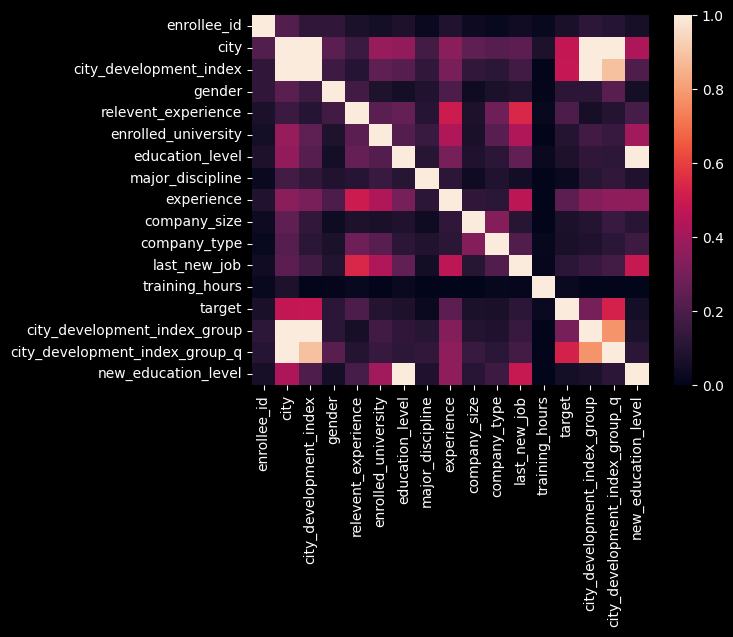

In [ ]:
sns.heatmap(phik_overview)


     ______________________________________
     
